In [1]:
import pandas as pd

# Retrieve HTML table data
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'
html = pd.read_html(url, header = 0)
df2019 = html[0]

# Data cleaning
raw = df2019.drop(df2019[df2019.Age == 'Age'].index)
raw

Rk                 Player   Age Team  Pos     G    GS    MP    FG  \
0      1.0           James Harden  29.0  HOU   PG  78.0  78.0  36.8  10.8   
1      2.0            Paul George  28.0  OKC   SF  77.0  77.0  36.9   9.2   
2      3.0  Giannis Antetokounmpo  24.0  MIL   PF  72.0  72.0  32.8  10.0   
3      4.0            Joel Embiid  24.0  PHI    C  64.0  64.0  33.7   9.1   
4      5.0           LeBron James  34.0  LAL   SF  55.0  55.0  35.2  10.1   
..     ...                    ...   ...  ...  ...   ...   ...   ...   ...   
704  527.0            Zach Lofton  26.0  DET   SG   1.0   0.0   4.0   0.0   
705  528.0           Kobi Simmons  21.0  CLE   PG   1.0   0.0   2.0   0.0   
706  529.0             Tyler Ulis  23.0  CHI   PG   1.0   0.0   1.0   0.0   
707  530.0            Okaro White  26.0  WAS   PF   3.0   0.0   2.0   0.0   
708    NaN         League Average   NaN  NaN  NaN   NaN   NaN   NaN   NaN   

      FGA  ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0    24.5  ...  0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1   
1    21.0  ...  1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0   
2    17.3  ...  2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7   
3    18.7  ...  2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5   
4    19.9  ...  1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4   
..    ...  ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
704   1.0  ...  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0   0.0   
705   0.0  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
706   0.0  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
707   0.7  ...  0.3   0.3   0.7  0.0  0.0  0.0  0.0  0.0   0.0   
708   NaN  ...  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   

                        Awards  
0                MVP-2,AS,NBA1  
1    MVP-3,DPOY-3,AS,NBA1,DEF1  
2    MVP-1,DPOY-2,AS,NBA1,DEF1  
3    MVP-7,DPOY-4,AS,NBA2,DEF2  
4               MVP-11,AS,NBA3  
..                         ...  
704                        NaN  
705                        NaN  
706                        NaN  
707                        NaN  
708                        NaN  

[709 rows x 31 columns]

## **Acronyms**


Acronym | Description
---|---
Rk | Rank
Pos | Position
Age | Player's age on February 1 of the season
Tm | Team
G | Games
GS | Games Started
MP | Minutes Played Per Game
FG | Field Goals Per Game
FGA | Field Goal Attempts Per Game
FG% | Field Goal Percentage
3P | 3-Point Field Goals Per Game
3PA | 3-Point Field Goal Attempts Per Game
3P% | FG% on 3-Pt FGAs.
2P | 2-Point Field Goals Per Game
2PA | 2-Point Field Goal Attempts Per Game
2P% | FG% on 2-Pt FGAs.
eFG% | Effective Field Goal Percentage
| *(Note: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.)*
FT | Free Throws Per Game
FTA | Free Throw Attempts Per Game
FT% | Free Throw Percentage
ORB | Offensive Rebounds Per Game
DRB | Defensive Rebounds Per Game
TRB | Total Rebounds Per Game
AST | Assists Per Game
STL | Steals Per Game
BLK | Blocks Per Game
TOV | Turnovers Per Game
PF | Personal Fouls Per Game
PTS | Points Per Game

## **Data cleaning**

### Data dimension

In [2]:
raw.shape

(709, 31)

### Dataframe contents

In [3]:
raw.head()

Rk                 Player   Age Team Pos     G    GS    MP    FG   FGA  \
0  1.0           James Harden  29.0  HOU  PG  78.0  78.0  36.8  10.8  24.5   
1  2.0            Paul George  28.0  OKC  SF  77.0  77.0  36.9   9.2  21.0   
2  3.0  Giannis Antetokounmpo  24.0  MIL  PF  72.0  72.0  32.8  10.0  17.3   
3  4.0            Joel Embiid  24.0  PHI   C  64.0  64.0  33.7   9.1  18.7   
4  5.0           LeBron James  34.0  LAL  SF  55.0  55.0  35.2  10.1  19.9   

   ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0  ...  0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1   
1  ...  1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0   
2  ...  2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7   
3  ...  2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5   
4  ...  1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4   

                      Awards  
0              MVP-2,AS,NBA1  
1  MVP-3,DPOY-3,AS,NBA1,DEF1  
2  MVP-1,DPOY-2,AS,NBA1,DEF1  
3  MVP-7,DPOY-4,AS,NBA2,DEF2  
4             MVP-11,AS,NBA3  

[5 rows x 31 columns]

### Check for missing values

In [4]:
raw.isnull().sum()

Rk          1
Player      0
Age         1
Team        1
Pos         1
G           1
GS          1
MP          1
FG          1
FGA         1
FG%         6
3P          1
3PA         1
3P%        47
2P          1
2PA         1
2P%        15
eFG%        6
FT          1
FTA         1
FT%        43
ORB         1
DRB         1
TRB         1
AST         1
STL         1
BLK         1
TOV         1
PF          1
PTS         1
Awards    651
dtype: int64

### Replace missing values with 0 

In [8]:
df = raw.fillna(0)

In [9]:
df.isnull().sum()

Rk        0
Player    0
Age       0
Team      0
Pos       0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Awards    0
dtype: int64

In [10]:
df = df.drop(['Rk'], axis=1)
df

Player   Age Team Pos     G    GS    MP    FG   FGA  \
0             James Harden  29.0  HOU  PG  78.0  78.0  36.8  10.8  24.5   
1              Paul George  28.0  OKC  SF  77.0  77.0  36.9   9.2  21.0   
2    Giannis Antetokounmpo  24.0  MIL  PF  72.0  72.0  32.8  10.0  17.3   
3              Joel Embiid  24.0  PHI   C  64.0  64.0  33.7   9.1  18.7   
4             LeBron James  34.0  LAL  SF  55.0  55.0  35.2  10.1  19.9   
..                     ...   ...  ...  ..   ...   ...   ...   ...   ...   
704            Zach Lofton  26.0  DET  SG   1.0   0.0   4.0   0.0   1.0   
705           Kobi Simmons  21.0  CLE  PG   1.0   0.0   2.0   0.0   0.0   
706             Tyler Ulis  23.0  CHI  PG   1.0   0.0   1.0   0.0   0.0   
707            Okaro White  26.0  WAS  PF   3.0   0.0   2.0   0.0   0.7   
708         League Average   0.0    0   0   0.0   0.0   0.0   0.0   0.0   

       FG%  ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0    0.442  ...  0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1   
1    0.438  ...  1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0   
2    0.578  ...  2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7   
3    0.484  ...  2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5   
4    0.510  ...  1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4   
..     ...  ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
704  0.000  ...  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0   0.0   
705  0.000  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
706  0.000  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
707  0.000  ...  0.3   0.3   0.7  0.0  0.0  0.0  0.0  0.0   0.0   
708  0.461  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   

                        Awards  
0                MVP-2,AS,NBA1  
1    MVP-3,DPOY-3,AS,NBA1,DEF1  
2    MVP-1,DPOY-2,AS,NBA1,DEF1  
3    MVP-7,DPOY-4,AS,NBA2,DEF2  
4               MVP-11,AS,NBA3  
..                         ...  
704                          0  
705                          0  
706                          0  
707                          0  
708                          0  

[709 rows x 30 columns]

### Write to CSV file

In [11]:
df.to_csv('nba2019.csv', index=False)

In [13]:
! cat nba2019.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


## **Exploratory Data Analysis**

### Read data

In [14]:
df = pd.read_csv('nba2019.csv')

#### Displays the dataframe

In [15]:
df

Player   Age Team Pos     G    GS    MP    FG   FGA  \
0             James Harden  29.0  HOU  PG  78.0  78.0  36.8  10.8  24.5   
1              Paul George  28.0  OKC  SF  77.0  77.0  36.9   9.2  21.0   
2    Giannis Antetokounmpo  24.0  MIL  PF  72.0  72.0  32.8  10.0  17.3   
3              Joel Embiid  24.0  PHI   C  64.0  64.0  33.7   9.1  18.7   
4             LeBron James  34.0  LAL  SF  55.0  55.0  35.2  10.1  19.9   
..                     ...   ...  ...  ..   ...   ...   ...   ...   ...   
704            Zach Lofton  26.0  DET  SG   1.0   0.0   4.0   0.0   1.0   
705           Kobi Simmons  21.0  CLE  PG   1.0   0.0   2.0   0.0   0.0   
706             Tyler Ulis  23.0  CHI  PG   1.0   0.0   1.0   0.0   0.0   
707            Okaro White  26.0  WAS  PF   3.0   0.0   2.0   0.0   0.7   
708         League Average   0.0    0   0   0.0   0.0   0.0   0.0   0.0   

       FG%  ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0    0.442  ...  0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1   
1    0.438  ...  1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0   
2    0.578  ...  2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7   
3    0.484  ...  2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5   
4    0.510  ...  1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4   
..     ...  ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
704  0.000  ...  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0   0.0   
705  0.000  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
706  0.000  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
707  0.000  ...  0.3   0.3   0.7  0.0  0.0  0.0  0.0  0.0   0.0   
708  0.461  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   

                        Awards  
0                MVP-2,AS,NBA1  
1    MVP-3,DPOY-3,AS,NBA1,DEF1  
2    MVP-1,DPOY-2,AS,NBA1,DEF1  
3    MVP-7,DPOY-4,AS,NBA2,DEF2  
4               MVP-11,AS,NBA3  
..                         ...  
704                          0  
705                          0  
706                          0  
707                          0  
708                          0  

[709 rows x 30 columns]

If we want to see more...

In [16]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [17]:
df

Player   Age Team Pos     G    GS    MP    FG   FGA  \
0                James Harden  29.0  HOU  PG  78.0  78.0  36.8  10.8  24.5   
1                 Paul George  28.0  OKC  SF  77.0  77.0  36.9   9.2  21.0   
2       Giannis Antetokounmpo  24.0  MIL  PF  72.0  72.0  32.8  10.0  17.3   
3                 Joel Embiid  24.0  PHI   C  64.0  64.0  33.7   9.1  18.7   
4                LeBron James  34.0  LAL  SF  55.0  55.0  35.2  10.1  19.9   
5               Stephen Curry  30.0  GSW  PG  69.0  69.0  33.8   9.2  19.4   
6                Devin Booker  22.0  PHO  SG  64.0  64.0  35.0   9.2  19.6   
7               Kawhi Leonard  27.0  TOR  SF  60.0  60.0  34.0   9.3  18.8   
8                Kevin Durant  30.0  GSW  SF  78.0  78.0  34.6   9.2  17.7   
9               Anthony Davis  25.0  NOP   C  56.0  56.0  33.0   9.5  18.3   
10             Damian Lillard  28.0  POR  PG  80.0  80.0  35.5   8.5  19.2   
11               Bradley Beal  25.0  WAS  SG  82.0  82.0  36.9   9.3  19.6   
12               Kemba Walker  28.0  CHO  PG  82.0  82.0  34.9   8.9  20.5   
13              Blake Griffin  29.0  DET  PF  75.0  75.0  35.0   8.3  17.9   
14         Karl-Anthony Towns  23.0  MIN   C  77.0  77.0  33.1   8.8  17.1   
15               Kyrie Irving  26.0  BOS  PG  67.0  67.0  33.0   9.0  18.5   
16           Donovan Mitchell  22.0  UTA  SG  77.0  77.0  33.7   8.6  19.9   
17                Zach LaVine  23.0  CHI  SG  63.0  62.0  34.5   8.4  18.0   
18          Russell Westbrook  30.0  OKC  PG  73.0  73.0  36.0   8.6  20.2   
19              Klay Thompson  28.0  GSW  SG  78.0  78.0  34.0   8.4  18.0   
20              Julius Randle  24.0  NOP  PF  73.0  49.0  30.6   7.8  14.9   
21          LaMarcus Aldridge  33.0  SAS   C  81.0  81.0  33.2   8.4  16.3   
22              DeMar DeRozan  29.0  SAS  SG  77.0  77.0  34.9   8.2  17.1   
23                Luka Dončić  19.0  DAL  SG  72.0  72.0  32.2   7.0  16.5   
24               Jrue Holiday  28.0  NOP  SG  67.0  67.0  35.9   8.2  17.3   
25                Mike Conley  31.0  MEM  PG  70.0  70.0  33.5   7.0  16.0   
26           D'Angelo Russell  22.0  BRK  PG  81.0  81.0  30.2   8.1  18.7   
27                CJ McCollum  27.0  POR  SG  70.0  70.0  33.9   8.2  17.8   
28             Nikola Vučević  28.0  ORL   C  80.0  80.0  31.4   8.8  16.9   
29                Buddy Hield  26.0  SAC  SG  82.0  82.0  31.9   7.6  16.6   
30                  John Wall  28.0  WAS  PG  32.0  32.0  34.5   7.7  17.3   
31               Nikola Jokić  23.0  DEN   C  80.0  80.0  31.3   7.7  15.1   
32              Tobias Harris  26.0  2TM  PF  82.0  82.0  34.7   7.5  15.3   
33              Tobias Harris  26.0  LAC  PF  55.0  55.0  34.6   7.7  15.5   
34              Tobias Harris  26.0  PHI  PF  27.0  27.0  35.0   6.9  14.8   
35             JaKarr Sampson  25.0  CHI  SF   4.0   0.0  31.8   7.3  13.5   
36               Lou Williams  32.0  LAC  SG  75.0   1.0  26.6   6.5  15.2   
37           Danilo Gallinari  30.0  LAC  SF  68.0  68.0  30.3   6.0  13.0   
38               John Collins  21.0  ATL  PF  61.0  59.0  30.0   7.6  13.6   
39                 Trae Young  20.0  ATL  PG  81.0  81.0  30.9   6.5  15.5   
40             Victor Oladipo  26.0  IND  SG  36.0  36.0  31.9   6.9  16.3   
41               Jimmy Butler  29.0  2TM  SG  65.0  65.0  33.6   6.4  13.9   
42               Jimmy Butler  29.0  MIN  SG  10.0  10.0  36.1   7.4  15.7   
43               Jimmy Butler  29.0  PHI  SF  55.0  55.0  33.2   6.3  13.6   
44                 Kyle Kuzma  23.0  LAL  PF  70.0  68.0  33.1   7.1  15.5   
45            Lauri Markkanen  21.0  CHI  PF  52.0  51.0  32.3   6.6  15.3   
46             Brandon Ingram  21.0  LAL  SF  52.0  52.0  33.8   7.0  14.0   
47            Khris Middleton  27.0  MIL  SF  77.0  77.0  31.1   6.6  14.9   
48               Jamal Murray  21.0  DEN  PG  75.0  74.0  32.6   6.8  15.6   
49           Tim Hardaway Jr.  26.0  2TM  SG  65.0  63.0  31.6   6.0  15.3   
50           Tim Hardaway Jr.  26.0  NYK  SG 

Reverting back to the default

In [18]:
pd.set_option('display.max_rows', 10)

In [19]:
df

Player   Age Team Pos     G    GS    MP    FG   FGA  \
0             James Harden  29.0  HOU  PG  78.0  78.0  36.8  10.8  24.5   
1              Paul George  28.0  OKC  SF  77.0  77.0  36.9   9.2  21.0   
2    Giannis Antetokounmpo  24.0  MIL  PF  72.0  72.0  32.8  10.0  17.3   
3              Joel Embiid  24.0  PHI   C  64.0  64.0  33.7   9.1  18.7   
4             LeBron James  34.0  LAL  SF  55.0  55.0  35.2  10.1  19.9   
..                     ...   ...  ...  ..   ...   ...   ...   ...   ...   
704            Zach Lofton  26.0  DET  SG   1.0   0.0   4.0   0.0   1.0   
705           Kobi Simmons  21.0  CLE  PG   1.0   0.0   2.0   0.0   0.0   
706             Tyler Ulis  23.0  CHI  PG   1.0   0.0   1.0   0.0   0.0   
707            Okaro White  26.0  WAS  PF   3.0   0.0   2.0   0.0   0.7   
708         League Average   0.0    0   0   0.0   0.0   0.0   0.0   0.0   

       FG%  ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0    0.442  ...  0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1   
1    0.438  ...  1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0   
2    0.578  ...  2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7   
3    0.484  ...  2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5   
4    0.510  ...  1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4   
..     ...  ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
704  0.000  ...  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0   0.0   
705  0.000  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
706  0.000  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
707  0.000  ...  0.3   0.3   0.7  0.0  0.0  0.0  0.0  0.0   0.0   
708  0.461  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   

                        Awards  
0                MVP-2,AS,NBA1  
1    MVP-3,DPOY-3,AS,NBA1,DEF1  
2    MVP-1,DPOY-2,AS,NBA1,DEF1  
3    MVP-7,DPOY-4,AS,NBA2,DEF2  
4               MVP-11,AS,NBA3  
..                         ...  
704                          0  
705                          0  
706                          0  
707                          0  
708                          0  

[709 rows x 30 columns]

### Overview of data types of each columns in the dataframe

In [20]:
df.dtypes

Player     object
Age       float64
Team       object
Pos        object
G         float64
           ...   
BLK       float64
TOV       float64
PF        float64
PTS       float64
Awards     object
Length: 30, dtype: object

### Show specific data types in dataframe

In [21]:
df.select_dtypes(include=['number'])

Age     G    GS    MP    FG   FGA    FG%   3P   3PA    3P%  ...    FT%  \
0    29.0  78.0  78.0  36.8  10.8  24.5  0.442  4.8  13.2  0.368  ...  0.879   
1    28.0  77.0  77.0  36.9   9.2  21.0  0.438  3.8   9.8  0.386  ...  0.839   
2    24.0  72.0  72.0  32.8  10.0  17.3  0.578  0.7   2.8  0.256  ...  0.729   
3    24.0  64.0  64.0  33.7   9.1  18.7  0.484  1.2   4.1  0.300  ...  0.804   
4    34.0  55.0  55.0  35.2  10.1  19.9  0.510  2.0   5.9  0.339  ...  0.665   
..    ...   ...   ...   ...   ...   ...    ...  ...   ...    ...  ...    ...   
704  26.0   1.0   0.0   4.0   0.0   1.0  0.000  0.0   1.0  0.000  ...  0.000   
705  21.0   1.0   0.0   2.0   0.0   0.0  0.000  0.0   0.0  0.000  ...  0.000   
706  23.0   1.0   0.0   1.0   0.0   0.0  0.000  0.0   0.0  0.000  ...  0.000   
707  26.0   3.0   0.0   2.0   0.0   0.7  0.000  0.0   0.7  0.000  ...  0.000   
708   0.0   0.0   0.0   0.0   0.0   0.0  0.461  0.0   0.0  0.355  ...  0.766   

     ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1  
1    1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0  
2    2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7  
3    2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5  
4    1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4  
..   ...   ...   ...  ...  ...  ...  ...  ...   ...  
704  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0   0.0  
705  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  
706  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  
707  0.3   0.3   0.7  0.0  0.0  0.0  0.0  0.0   0.0  
708  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  

[709 rows x 26 columns]

In [22]:
df.select_dtypes(include=['object'])

Player Team Pos                     Awards
0             James Harden  HOU  PG              MVP-2,AS,NBA1
1              Paul George  OKC  SF  MVP-3,DPOY-3,AS,NBA1,DEF1
2    Giannis Antetokounmpo  MIL  PF  MVP-1,DPOY-2,AS,NBA1,DEF1
3              Joel Embiid  PHI   C  MVP-7,DPOY-4,AS,NBA2,DEF2
4             LeBron James  LAL  SF             MVP-11,AS,NBA3
..                     ...  ...  ..                        ...
704            Zach Lofton  DET  SG                          0
705           Kobi Simmons  CLE  PG                          0
706             Tyler Ulis  CHI  PG                          0
707            Okaro White  WAS  PF                          0
708         League Average    0   0                          0

[709 rows x 4 columns]

## **QUESTIONS**

### **Conditional Selection**


**Which player scored the most Points (PTS) Per Game?**
Here, we will return the entire row.

In [23]:
df[df.PTS == df.PTS.max()]

Player   Age Team Pos     G    GS    MP    FG   FGA    FG%  ...  ORB  \
0  James Harden  29.0  HOU  PG  78.0  78.0  36.8  10.8  24.5  0.442  ...  0.8   

   DRB  TRB  AST  STL  BLK  TOV   PF   PTS         Awards  
0  5.8  6.6  7.5  2.0  0.7  5.0  3.1  36.1  MVP-2,AS,NBA1  

[1 rows x 30 columns]

We will return specific column values.

Further question, what team is the player from? 

In [27]:
PlayerMaxPoints = df[df.PTS == df.PTS.max()]


Which position is the player playing as?

In [28]:
PlayerMaxPoints.Pos

0    PG
Name: Pos, dtype: object

How many games did the player played in the season?

In [29]:
PlayerMaxPoints.G

0    78.0
Name: G, dtype: float64

**Which player scored more than 20 Points (PTS) Per Game?**

In [30]:
df[df.PTS > 20]

Player   Age Team Pos     G    GS    MP    FG   FGA    FG%  \
0            James Harden  29.0  HOU  PG  78.0  78.0  36.8  10.8  24.5  0.442   
1             Paul George  28.0  OKC  SF  77.0  77.0  36.9   9.2  21.0  0.438   
2   Giannis Antetokounmpo  24.0  MIL  PF  72.0  72.0  32.8  10.0  17.3  0.578   
3             Joel Embiid  24.0  PHI   C  64.0  64.0  33.7   9.1  18.7  0.484   
4            LeBron James  34.0  LAL  SF  55.0  55.0  35.2  10.1  19.9  0.510   
..                    ...   ...  ...  ..   ...   ...   ...   ...   ...    ...   
29            Buddy Hield  26.0  SAC  SG  82.0  82.0  31.9   7.6  16.6  0.458   
30              John Wall  28.0  WAS  PG  32.0  32.0  34.5   7.7  17.3  0.444   
31           Nikola Jokić  23.0  DEN   C  80.0  80.0  31.3   7.7  15.1  0.511   
33          Tobias Harris  26.0  LAC  PF  55.0  55.0  34.6   7.7  15.5  0.496   
42           Jimmy Butler  29.0  MIN  SG  10.0  10.0  36.1   7.4  15.7  0.471   

    ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0   ...  0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1   
1   ...  1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0   
2   ...  2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7   
3   ...  2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5   
4   ...  1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4   
..  ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
29  ...  1.3   3.7   5.0  2.5  0.7  0.4  1.8  2.5  20.7   
30  ...  0.5   3.2   3.6  8.7  1.5  0.9  3.8  2.2  20.7   
31  ...  2.9   8.0  10.8  7.3  1.4  0.7  3.1  2.9  20.1   
33  ...  0.7   7.2   7.9  2.7  0.7  0.4  2.0  2.2  20.9   
42  ...  1.6   3.6   5.2  4.3  2.4  1.0  1.4  1.8  21.3   

                       Awards  
0               MVP-2,AS,NBA1  
1   MVP-3,DPOY-3,AS,NBA1,DEF1  
2   MVP-1,DPOY-2,AS,NBA1,DEF1  
3   MVP-7,DPOY-4,AS,NBA2,DEF2  
4              MVP-11,AS,NBA3  
..                        ...  
29                          0  
30                          0  
31              MVP-4,AS,NBA1  
33                          0  
42                          0  

[34 rows x 30 columns]

**Which player had the highest 3-Point Field Goals Per Game (3P) ?**

In [31]:
df[df['3P'] == df['3P'].max()]

Player   Age Team Pos     G    GS    MP   FG   FGA    FG%  ...  ORB  \
5  Stephen Curry  30.0  GSW  PG  69.0  69.0  33.8  9.2  19.4  0.472  ...  0.7   

   DRB  TRB  AST  STL  BLK  TOV   PF   PTS         Awards  
5  4.7  5.3  5.2  1.3  0.4  2.8  2.4  27.3  MVP-5,AS,NBA1  

[1 rows x 30 columns]

**Which player had the highest Assists Per Game (AST) ?**

In [32]:
df[df['AST'] == df['AST'].max()]

Player   Age Team Pos     G    GS    MP   FG   FGA    FG%  ...  \
18  Russell Westbrook  30.0  OKC  PG  73.0  73.0  36.0  8.6  20.2  0.428  ...   

    ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS          Awards  
18  1.5  9.6  11.1  10.7  1.9  0.5  4.5  3.4  22.9  MVP-10,AS,NBA3  

[1 rows x 30 columns]

### **GroupBy() function**

**Which player scored the highest (PTS) in the Los Angeles Lakers?**

In [34]:
LAL = df.groupby('Team').get_group('LAL')

In [35]:
LAL[LAL.PTS == LAL.PTS.max()]

Player   Age Team Pos     G    GS    MP    FG   FGA   FG%  ...  ORB  \
4  LeBron James  34.0  LAL  SF  55.0  55.0  35.2  10.1  19.9  0.51  ...  1.0   

   DRB  TRB  AST  STL  BLK  TOV   PF   PTS          Awards  
4  7.4  8.5  8.3  1.3  0.6  3.6  1.7  27.4  MVP-11,AS,NBA3  

[1 rows x 30 columns]

**Of the 5 positions, which position scores the most points?**

We first group players by their positions.

In [36]:
df.groupby('Pos').PTS.describe()

count      mean       std  min    25%   50%    75%   max
Pos                                                          
0      1.0  0.000000       NaN  0.0  0.000  0.00   0.00   0.0
C    121.0  8.770248  5.595484  0.0  4.200  7.70  12.30  27.5
PF   150.0  7.724667  5.626996  0.0  3.325  6.20  11.10  27.7
PG   139.0  8.668345  6.284234  0.0  4.300  7.00  11.05  36.1
SF   122.0  8.272951  5.900400  0.0  4.225  6.70  11.80  28.0
SG   176.0  8.534091  5.746052  0.0  4.000  7.65  11.30  26.6

We will now show only the 5 traditional positions (those having combo positions will be removed from the analysis).

In [37]:
positions = ['C','PF','SF','PG','SG']
POS = df[ df['Pos'].isin(positions)  ]
POS

Player   Age Team Pos     G    GS    MP    FG   FGA  \
0             James Harden  29.0  HOU  PG  78.0  78.0  36.8  10.8  24.5   
1              Paul George  28.0  OKC  SF  77.0  77.0  36.9   9.2  21.0   
2    Giannis Antetokounmpo  24.0  MIL  PF  72.0  72.0  32.8  10.0  17.3   
3              Joel Embiid  24.0  PHI   C  64.0  64.0  33.7   9.1  18.7   
4             LeBron James  34.0  LAL  SF  55.0  55.0  35.2  10.1  19.9   
..                     ...   ...  ...  ..   ...   ...   ...   ...   ...   
703            George King  25.0  PHO  SF   1.0   0.0   6.0   0.0   0.0   
704            Zach Lofton  26.0  DET  SG   1.0   0.0   4.0   0.0   1.0   
705           Kobi Simmons  21.0  CLE  PG   1.0   0.0   2.0   0.0   0.0   
706             Tyler Ulis  23.0  CHI  PG   1.0   0.0   1.0   0.0   0.0   
707            Okaro White  26.0  WAS  PF   3.0   0.0   2.0   0.0   0.7   

       FG%  ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0    0.442  ...  0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1   
1    0.438  ...  1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0   
2    0.578  ...  2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7   
3    0.484  ...  2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5   
4    0.510  ...  1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4   
..     ...  ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
703  0.000  ...  0.0   1.0   1.0  0.0  0.0  0.0  0.0  0.0   0.0   
704  0.000  ...  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0   0.0   
705  0.000  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
706  0.000  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
707  0.000  ...  0.3   0.3   0.7  0.0  0.0  0.0  0.0  0.0   0.0   

                        Awards  
0                MVP-2,AS,NBA1  
1    MVP-3,DPOY-3,AS,NBA1,DEF1  
2    MVP-1,DPOY-2,AS,NBA1,DEF1  
3    MVP-7,DPOY-4,AS,NBA2,DEF2  
4               MVP-11,AS,NBA3  
..                         ...  
703                          0  
704                          0  
705                          0  
706                          0  
707                          0  

[708 rows x 30 columns]

Now, let's take a look at the descriptive statistics.

In [38]:
POS.groupby('Pos').PTS.describe()

count      mean       std  min    25%   50%    75%   max
Pos                                                          
C    121.0  8.770248  5.595484  0.0  4.200  7.70  12.30  27.5
PF   150.0  7.724667  5.626996  0.0  3.325  6.20  11.10  27.7
PG   139.0  8.668345  6.284234  0.0  4.300  7.00  11.05  36.1
SF   122.0  8.272951  5.900400  0.0  4.225  6.70  11.80  28.0
SG   176.0  8.534091  5.746052  0.0  4.000  7.65  11.30  26.6

### **Histograms**

We'll also try to answer this question by showing some histogram plots. So, to make it a bit easier, let's create a subset dataframe.

In [39]:
PTS = df[['Pos','PTS']]

positions = ['C','PF','SF','PG','SG']
PTS = PTS[ PTS['Pos'].isin(positions)  ]

PTS

Pos   PTS
0    PG  36.1
1    SF  28.0
2    PF  27.7
3     C  27.5
4    SF  27.4
..   ..   ...
703  SF   0.0
704  SG   0.0
705  PG   0.0
706  PG   0.0
707  PF   0.0

[708 rows x 2 columns]

#### **pandas built-in visualization**

array([[<Axes: title={'center': 'C'}>, <Axes: title={'center': 'PF'}>],
       [<Axes: title={'center': 'PG'}>, <Axes: title={'center': 'SF'}>],
       [<Axes: title={'center': 'SG'}>, <Axes: >]], dtype=object)

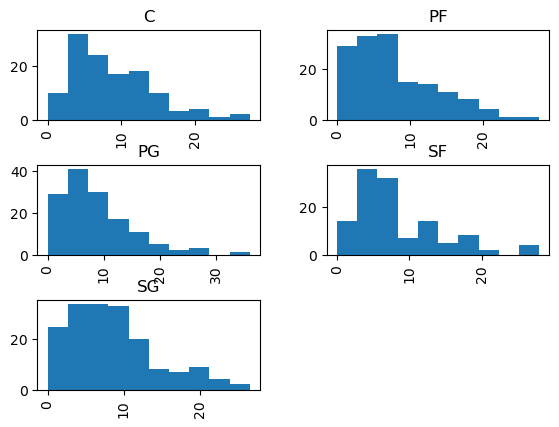

In [40]:
PTS['PTS'].hist(by=PTS['Pos'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a260e10b8>,
      dtype=object)

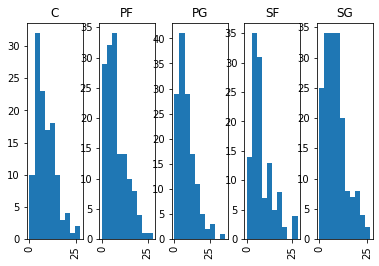

In [ ]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5))

array([<Axes: title={'center': 'C'}>, <Axes: title={'center': 'PF'}>,
       <Axes: title={'center': 'PG'}>, <Axes: title={'center': 'SF'}>,
       <Axes: title={'center': 'SG'}>], dtype=object)

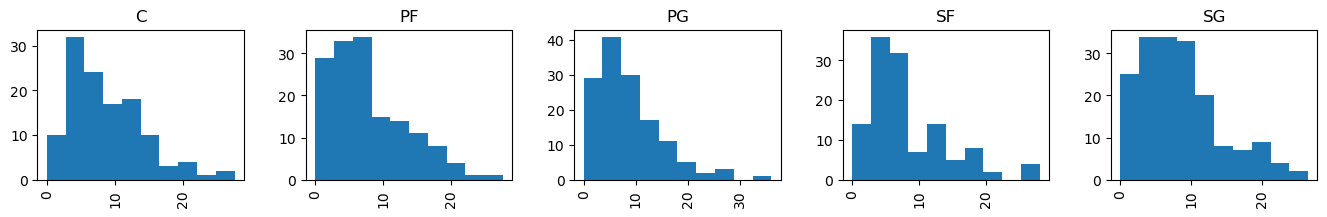

In [41]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5), figsize=(16,2))


#### **Seaborn data visualization**

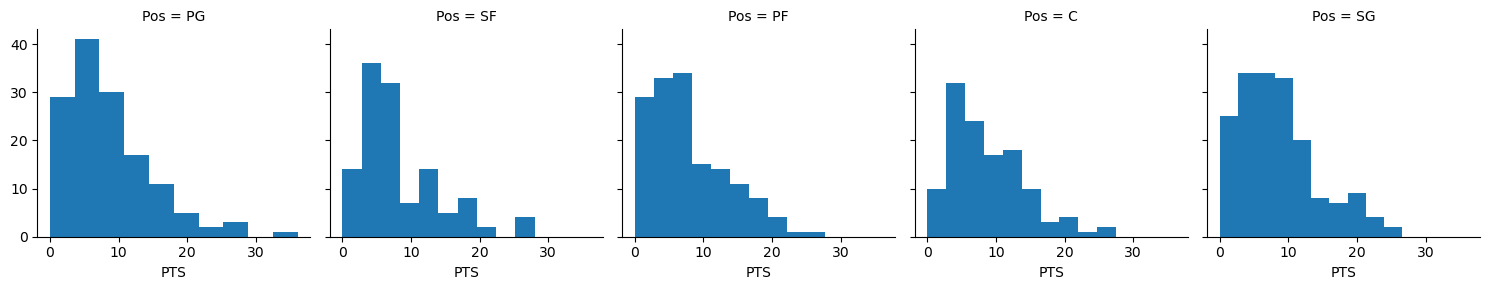

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(PTS, col="Pos")
g.map(plt.hist, "PTS");

### **Box plots**

#### **Box plot of points scored (PTS) grouped by Position**

##### **pandas built-in visualization**

<Axes: title={'center': 'PTS'}, xlabel='Pos'>

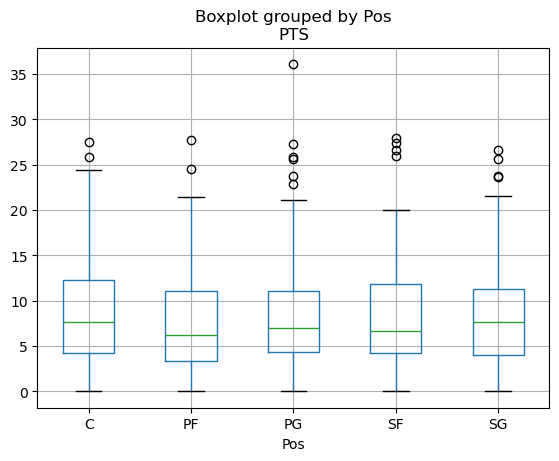

In [43]:
PTS.boxplot(column='PTS', by='Pos')

##### **Seaborn data visualization**

<Axes: xlabel='Pos', ylabel='PTS'>

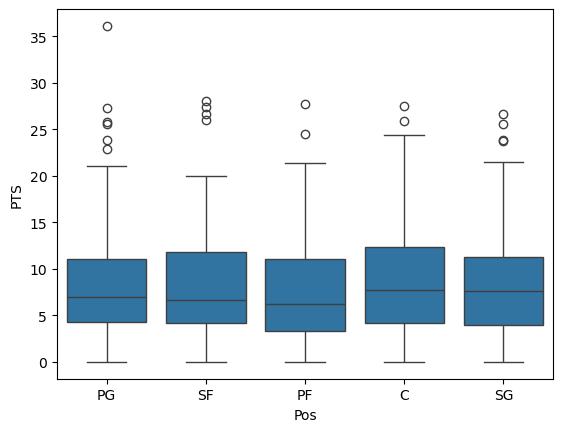

In [44]:
import seaborn as sns

sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 

<Axes: xlabel='Pos', ylabel='PTS'>

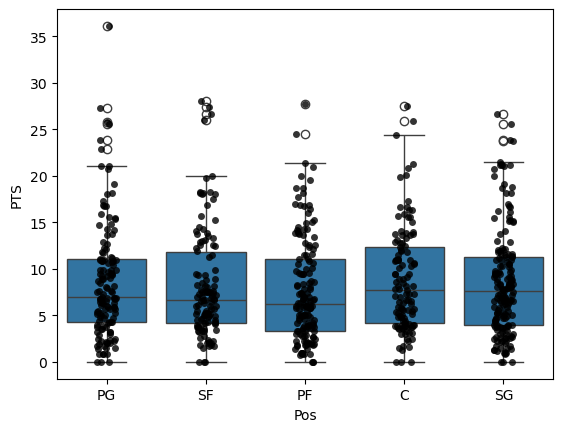

In [45]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

### **Heat map**

#### Compute the correlation matrix

In [49]:
corr = df.select_dtypes(include='number').corr()
corr


Age         G        GS        MP        FG       FGA       FG%  \
Age  1.000000  0.079996  0.046125  0.160591  0.069211  0.085226  0.033890   
G    0.079996  1.000000  0.641780  0.618993  0.542970  0.523706  0.296822   
GS   0.046125  0.641780  1.000000  0.764200  0.724801  0.711980  0.207984   
MP   0.160591  0.618993  0.764200  1.000000  0.871263  0.892577  0.249379   
FG   0.069211  0.542970  0.724801  0.871263  1.000000  0.973433  0.350539   
..        ...       ...       ...       ...       ...       ...       ...   
STL  0.091010  0.406375  0.567474  0.735643  0.636701  0.660358  0.160470   
BLK  0.020373  0.339854  0.425170  0.439846  0.461056  0.363740  0.379586   
TOV  0.073895  0.475034  0.650292  0.767020  0.830578  0.832936  0.213424   
PF   0.123332  0.478257  0.538089  0.732517  0.625604  0.593594  0.350031   
PTS  0.092048  0.535873  0.721159  0.876070  0.990043  0.980497  0.304869   

           3P       3PA       3P%  ...       FT%       ORB       DRB  \
Age  0.171353  0.165518  0.074767  ...  0.164248 -0.006603  0.113558   
G    0.397646  0.378234  0.189165  ...  0.417560  0.290590  0.443330   
GS   0.497017  0.486276  0.147406  ...  0.266553  0.378192  0.599511   
MP   0.687557  0.694577  0.261490  ...  0.451729  0.388144  0.696856   
FG   0.605798  0.601831  0.217051  ...  0.370360  0.465502  0.723843   
..        ...       ...       ...  ...       ...       ...       ...   
STL  0.476318  0.491141  0.146424  ...  0.265724  0.258631  0.477312   
BLK  0.027429  0.024166 -0.098452  ...  0.150186  0.642541  0.661995   
TOV  0.464742  0.487589  0.131881  ...  0.301283  0.363787  0.656546   
PF   0.354977  0.355415  0.092943  ...  0.343748  0.552961  0.670291   
PTS  0.670161  0.667494  0.245599  ...  0.400298  0.409773  0.703766   

          TRB       AST       STL       BLK       TOV        PF       PTS  
Age  0.082868  0.147294  0.091010  0.020373  0.073895  0.123332  0.092048  
G    0.423467  0.414119  0.406375  0.339854  0.475034  0.478257  0.535873  
GS   0.568136  0.564355  0.567474  0.425170  0.650292  0.538089  0.721159  
MP   0.643662  0.676322  0.735643  0.439846  0.767020  0.732517  0.876070  
FG   0.688381  0.666474  0.636701  0.461056  0.830578  0.625604  0.990043  
..        ...       ...       ...       ...       ...       ...       ...  
STL  0.438505  0.634181  1.000000  0.342891  0.629761  0.529927  0.638691  
BLK  0.697728  0.149751  0.342891  1.000000  0.370123  0.563752  0.429297  
TOV  0.606503  0.820964  0.629761  0.370123  1.000000  0.604032  0.833912  
PF   0.674290  0.397911  0.529927  0.563752  0.604032  1.000000  0.614322  
PTS  0.655943  0.676706  0.638691  0.429297  0.833912  0.614322  1.000000  

[26 rows x 26 columns]

#### Make the heat map

<Axes: >

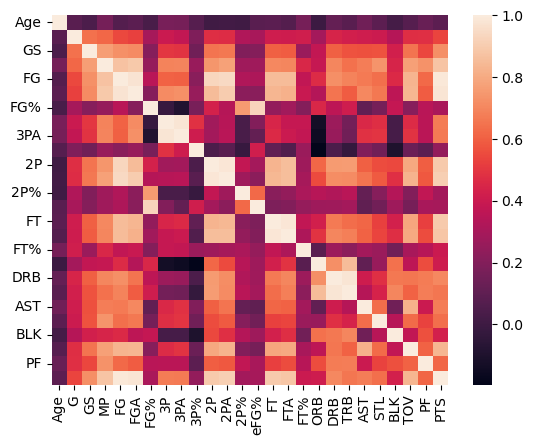

In [50]:
sns.heatmap(corr)

#### Adjust figure size of heat map

<Axes: >

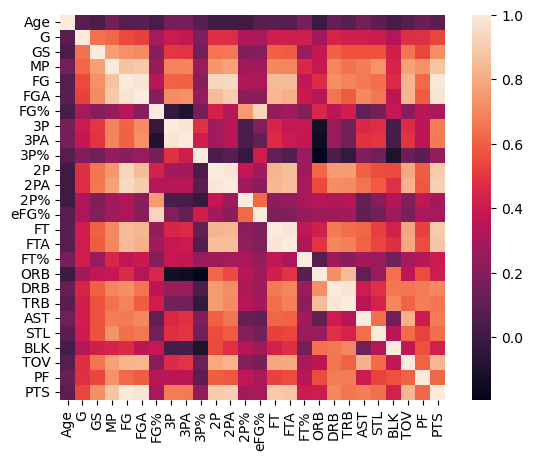

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

#### Mask diagonal half of heat map (Diagonal correlation matrix)

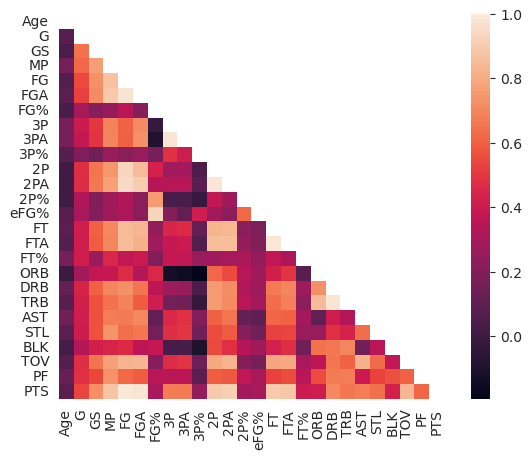

In [52]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

import numpy as np
import seaborn as sns

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

### **Scatter Plot**

In [53]:
df

Player   Age Team Pos     G    GS    MP    FG   FGA  \
0             James Harden  29.0  HOU  PG  78.0  78.0  36.8  10.8  24.5   
1              Paul George  28.0  OKC  SF  77.0  77.0  36.9   9.2  21.0   
2    Giannis Antetokounmpo  24.0  MIL  PF  72.0  72.0  32.8  10.0  17.3   
3              Joel Embiid  24.0  PHI   C  64.0  64.0  33.7   9.1  18.7   
4             LeBron James  34.0  LAL  SF  55.0  55.0  35.2  10.1  19.9   
..                     ...   ...  ...  ..   ...   ...   ...   ...   ...   
704            Zach Lofton  26.0  DET  SG   1.0   0.0   4.0   0.0   1.0   
705           Kobi Simmons  21.0  CLE  PG   1.0   0.0   2.0   0.0   0.0   
706             Tyler Ulis  23.0  CHI  PG   1.0   0.0   1.0   0.0   0.0   
707            Okaro White  26.0  WAS  PF   3.0   0.0   2.0   0.0   0.7   
708         League Average   0.0    0   0   0.0   0.0   0.0   0.0   0.0   

       FG%  ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0    0.442  ...  0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1   
1    0.438  ...  1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0   
2    0.578  ...  2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7   
3    0.484  ...  2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5   
4    0.510  ...  1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4   
..     ...  ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
704  0.000  ...  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0   0.0   
705  0.000  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
706  0.000  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
707  0.000  ...  0.3   0.3   0.7  0.0  0.0  0.0  0.0  0.0   0.0   
708  0.461  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   

                        Awards  
0                MVP-2,AS,NBA1  
1    MVP-3,DPOY-3,AS,NBA1,DEF1  
2    MVP-1,DPOY-2,AS,NBA1,DEF1  
3    MVP-7,DPOY-4,AS,NBA2,DEF2  
4               MVP-11,AS,NBA3  
..                         ...  
704                          0  
705                          0  
706                          0  
707                          0  
708                          0  

[709 rows x 30 columns]

#### Select columns if they have numerical data types

In [54]:
df.select_dtypes(include=['number'])

Age     G    GS    MP    FG   FGA    FG%   3P   3PA    3P%  ...    FT%  \
0    29.0  78.0  78.0  36.8  10.8  24.5  0.442  4.8  13.2  0.368  ...  0.879   
1    28.0  77.0  77.0  36.9   9.2  21.0  0.438  3.8   9.8  0.386  ...  0.839   
2    24.0  72.0  72.0  32.8  10.0  17.3  0.578  0.7   2.8  0.256  ...  0.729   
3    24.0  64.0  64.0  33.7   9.1  18.7  0.484  1.2   4.1  0.300  ...  0.804   
4    34.0  55.0  55.0  35.2  10.1  19.9  0.510  2.0   5.9  0.339  ...  0.665   
..    ...   ...   ...   ...   ...   ...    ...  ...   ...    ...  ...    ...   
704  26.0   1.0   0.0   4.0   0.0   1.0  0.000  0.0   1.0  0.000  ...  0.000   
705  21.0   1.0   0.0   2.0   0.0   0.0  0.000  0.0   0.0  0.000  ...  0.000   
706  23.0   1.0   0.0   1.0   0.0   0.0  0.000  0.0   0.0  0.000  ...  0.000   
707  26.0   3.0   0.0   2.0   0.0   0.7  0.000  0.0   0.7  0.000  ...  0.000   
708   0.0   0.0   0.0   0.0   0.0   0.0  0.461  0.0   0.0  0.355  ...  0.766   

     ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1  
1    1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0  
2    2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7  
3    2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5  
4    1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4  
..   ...   ...   ...  ...  ...  ...  ...  ...   ...  
704  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0   0.0  
705  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  
706  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  
707  0.3   0.3   0.7  0.0  0.0  0.0  0.0  0.0   0.0  
708  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  

[709 rows x 26 columns]

#### Select the first 5 columns (by index number)

In [55]:
number = df.select_dtypes(include=['number'])

In [56]:
number.iloc[:,:5]

Age     G    GS    MP    FG
0    29.0  78.0  78.0  36.8  10.8
1    28.0  77.0  77.0  36.9   9.2
2    24.0  72.0  72.0  32.8  10.0
3    24.0  64.0  64.0  33.7   9.1
4    34.0  55.0  55.0  35.2  10.1
..    ...   ...   ...   ...   ...
704  26.0   1.0   0.0   4.0   0.0
705  21.0   1.0   0.0   2.0   0.0
706  23.0   1.0   0.0   1.0   0.0
707  26.0   3.0   0.0   2.0   0.0
708   0.0   0.0   0.0   0.0   0.0

[709 rows x 5 columns]

#### Select 5 specific columns (by column names)

In [59]:
selections = ['Age', 'G', 'STL', 'BLK', 'AST', 'PTS']
df5 = df[selections]
df5

Age     G  STL  BLK  AST   PTS
0    29.0  78.0  2.0  0.7  7.5  36.1
1    28.0  77.0  2.2  0.4  4.1  28.0
2    24.0  72.0  1.3  1.5  5.9  27.7
3    24.0  64.0  0.7  1.9  3.7  27.5
4    34.0  55.0  1.3  0.6  8.3  27.4
..    ...   ...  ...  ...  ...   ...
704  26.0   1.0  1.0  0.0  0.0   0.0
705  21.0   1.0  0.0  0.0  0.0   0.0
706  23.0   1.0  0.0  0.0  0.0   0.0
707  26.0   3.0  0.0  0.0  0.0   0.0
708   0.0   0.0  0.0  0.0  0.0   0.0

[709 rows x 6 columns]

#### Make scatter plot grid

##### 5 columns

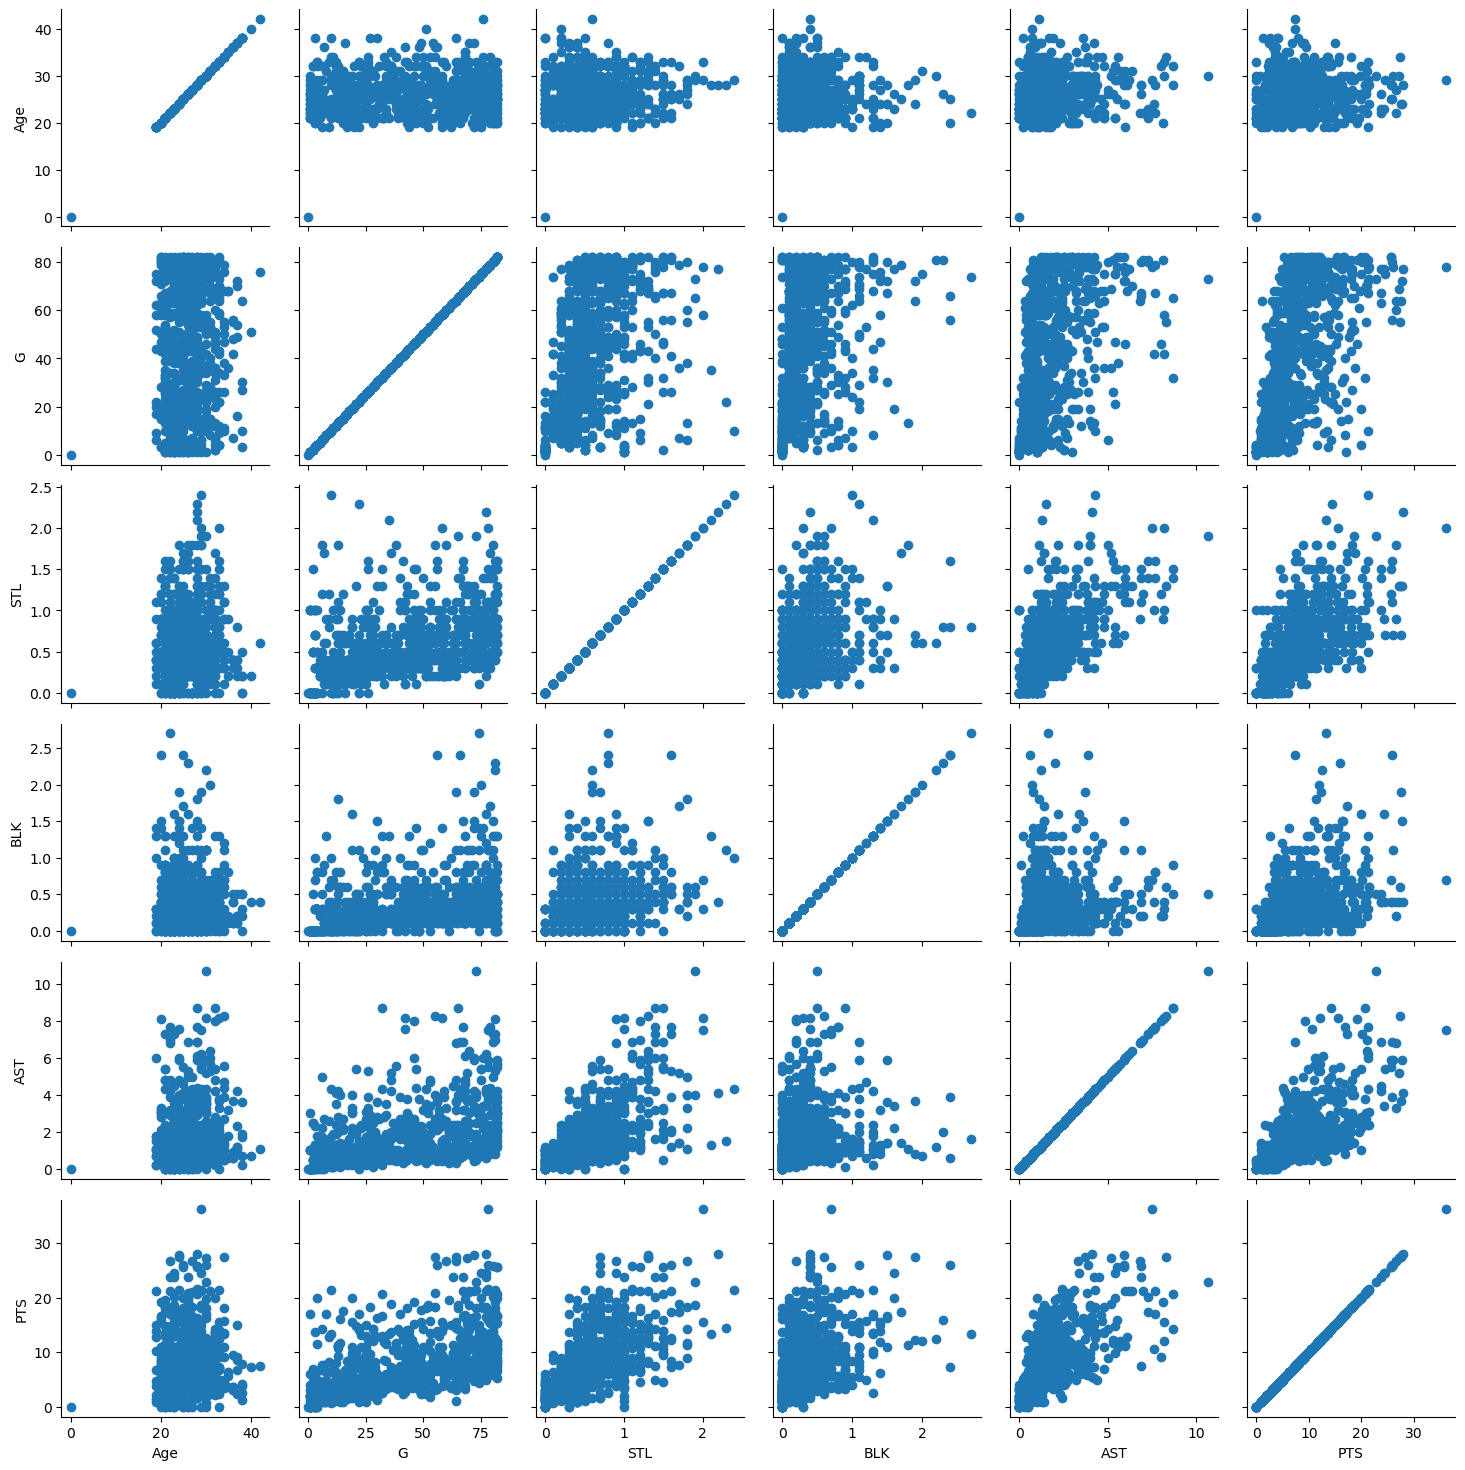

In [60]:
import seaborn as sns

g = sns.PairGrid(df5)
g.map(plt.scatter);

##### All columns

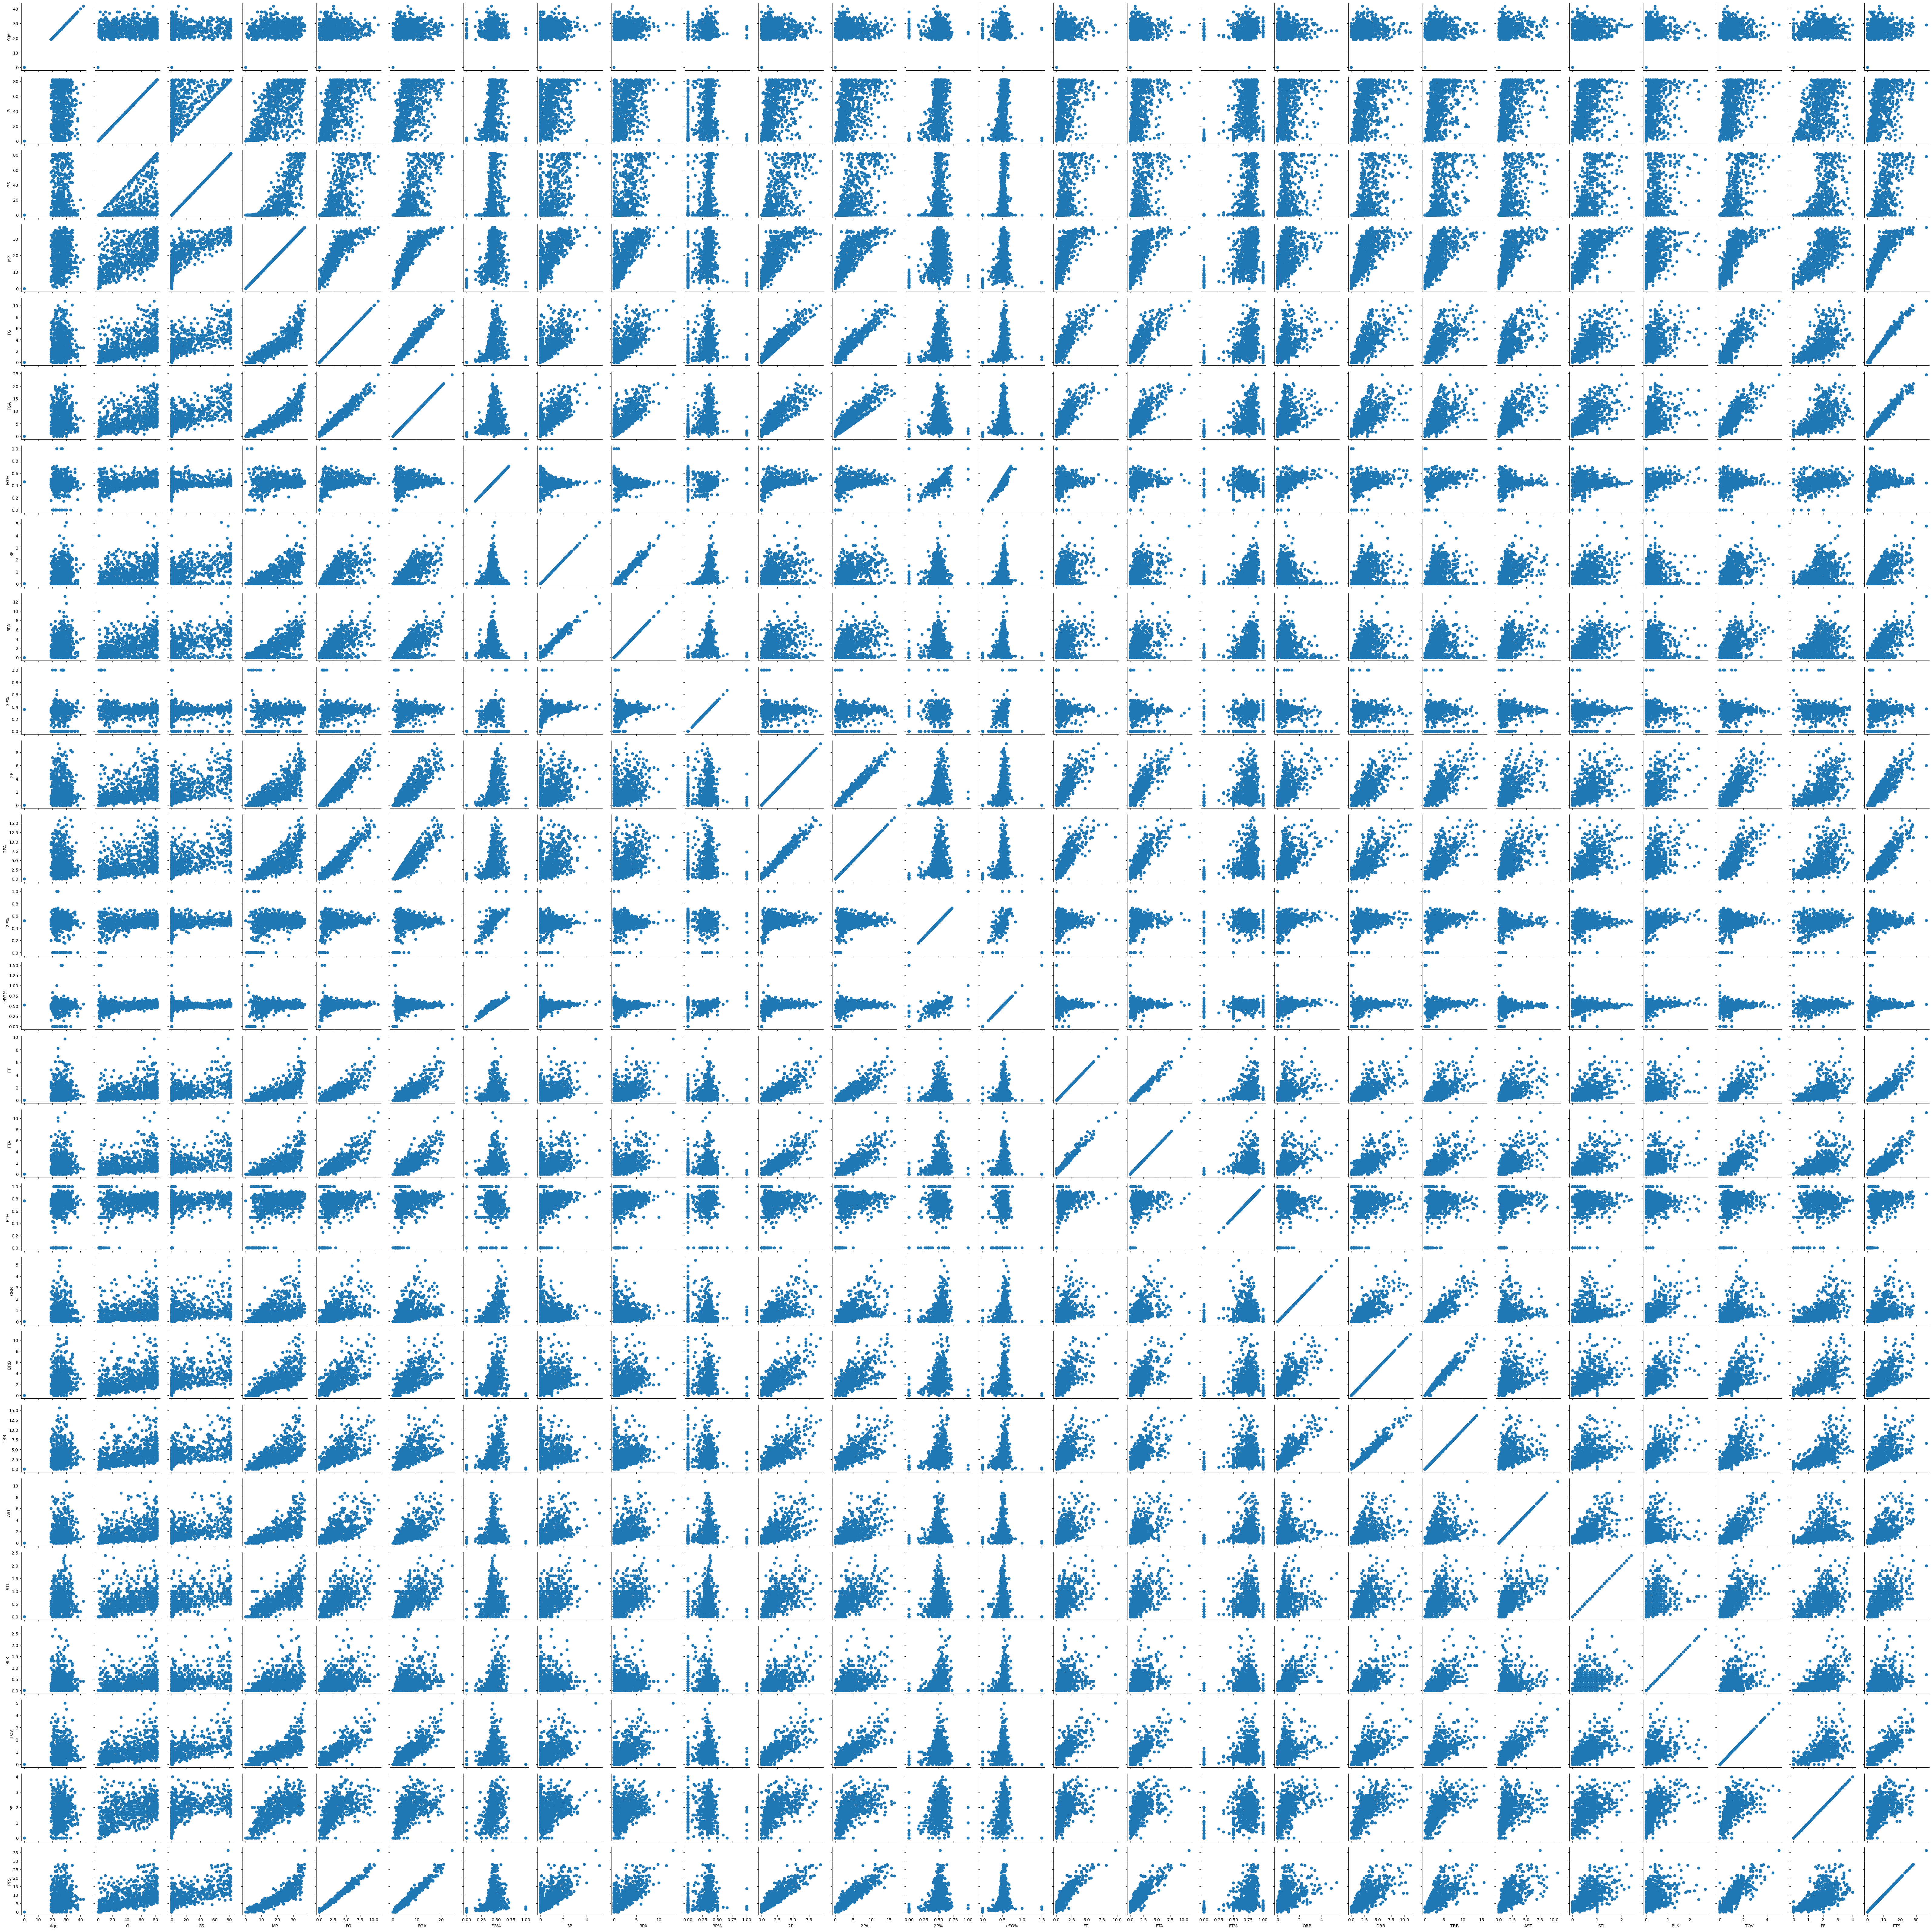

In [61]:
import seaborn as sns

g = sns.PairGrid(number)
g.map(plt.scatter);